# Hierarchical Model

In [24]:
from pymc3 import Model, Normal, Uniform, Gamma
from pymc3.math import sqrt
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

school_obs = np.array([28, 8, -3, 7,-1, 1, 18, 12])
sigmas = np.array([15, 10, 16, 11, 9, 11, 10, 18])

hierarch_model = Model()

with hierarch_model:
    
    mu = Normal('mu', 0, np.power(10, 6))
    vtau = Gamma('tau^2', 1e-3, np.power(15, 2)*1e-3)
    tau = sqrt(vtau)
    
    theta = []
    y = []
    
    for j in range(len(school_obs)):
        theta.append(Normal('theta{0}'.format(j+1), mu=mu, sd=tau))
        y.append(Normal('y{0}'.format(j+1), mu=theta[j], sd=sigmas[j], observed=school_obs[j]))

In [25]:
from pymc3 import NUTS, sample
from scipy import optimize

with hierarch_model:
    hierarch_trace=sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -52.902: 100%|██████████| 200000/200000 [00:14<00:00, 14186.50it/s]
Finished [100%]: Average ELBO = -52.822
100%|██████████| 10000/10000 [00:29<00:00, 336.02it/s]



mu:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  7.599            3.941            0.185            [-0.160, 15.250]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.113         4.985          7.642          10.177         15.365


theta1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  7.750            4.089            0.183            [-0.263, 15.736]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.151         4.979          7.790          10.373         15.911


theta2:

  Mean             SD               MC Error         95% HPD interval
  --------------------

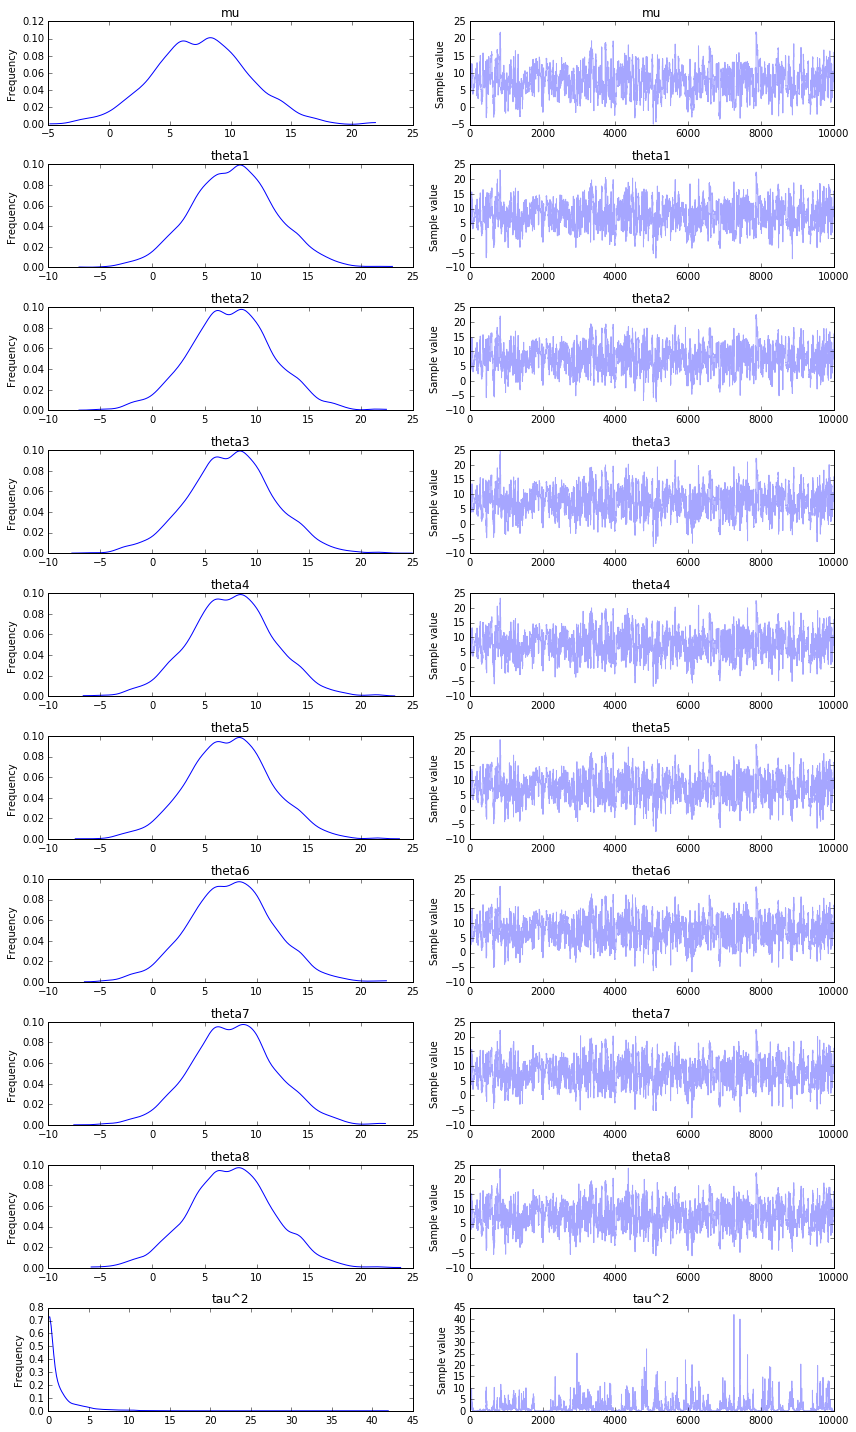

In [26]:
from pymc3 import traceplot, summary

traceplot(hierarch_trace)
summary(hierarch_trace)

In [41]:
import pymc3 as pm

hierarch_dic = pm.stats.dic(model=hierarch_model, trace=hierarch_trace)
hierarch_dic

NameError: name 'hierarchtrace' is not defined

# No-Pooling Model

In [29]:
no_pool_model = Model()

with no_pool_model:
    theta = []
    y = []
    
    for j in range(len(school_obs)):
        theta.append(Normal('theta{0}'.format(j+1), 0, 10000))
        y.append(Normal('y{0}'.format(j+1), mu=theta[j], sd=sigmas[j], observed=school_obs[j]))

In [30]:
with no_pool_model:
    no_pool_trace=sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -81.165: 100%|██████████| 200000/200000 [00:10<00:00, 19528.03it/s]
Finished [100%]: Average ELBO = -81.138
100%|██████████| 10000/10000 [00:06<00:00, 1613.93it/s]



theta1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  28.203           14.678           0.116            [0.384, 56.754]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.414         18.187         28.303         38.174         56.221


theta2:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  7.848            10.069           0.085            [-12.141, 27.317]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -11.967        0.895          7.877          14.881         27.686


theta3:

  Mean             SD               MC Error         95% HPD interval
  ----------------

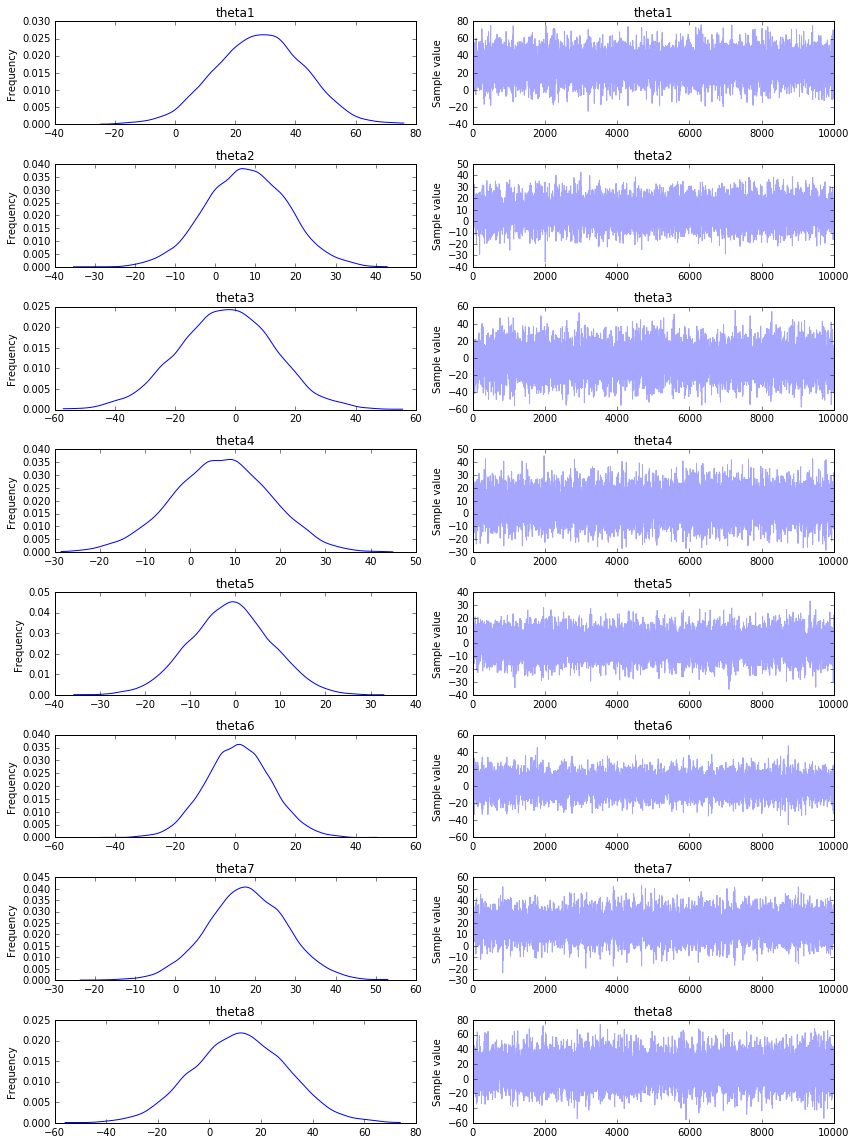

In [31]:
traceplot(no_pool_trace)
summary(no_pool_trace)

In [40]:
no_pool_dic = pm.stats.dic(model=no_pool_model, trace=no_pool_trace)
no_pool_dic

232.52988073107653

# Complete Pooling Model

In [35]:
complete_pool_model = Model()

with complete_pool_model:
    theta = Normal('theta', 0, 10000)
    y = []
    
    for j in range(len(school_obs)):
        y.append(Normal('y{0}'.format(j+1), mu=theta, sd=sigmas[j], observed=school_obs[j]))

In [36]:
with complete_pool_model:
    complete_pool_trace=sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -37.486: 100%|██████████| 200000/200000 [00:07<00:00, 26983.19it/s]
Finished [100%]: Average ELBO = -37.493
 27%|██▋       | 2707/10000 [00:00<00:01, 3821.24it/s]



theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  7.870            3.994            0.127            [0.252, 15.989]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.028         5.140          7.820          10.476         15.797



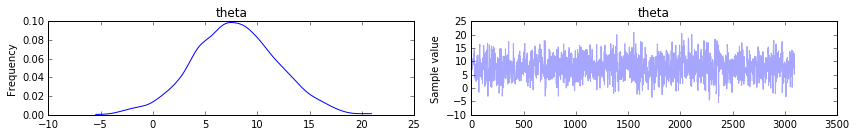

In [42]:
traceplot(complete_pool_trace)
summary(complete_pool_trace)

In [43]:
complete_pool_dic = pm.stats.dic(model=complete_pool_model, trace=complete_pool_trace)
complete_pool_dic

81.533288023356647

# DIC Comparison

In [46]:
print("Model                |  DIC")
print("----------------------------------------")
print("Hierarchical Pooling | {0}".format(hierarch_dic))
print("No Pooling           | {0}".format(no_pool_dic))
print("Complete Pooling     | {0}".format(complete_pool_dic))

Model                |  DIC
----------------------------------------
Hierarchical Pooling | 129.35922183142253
No Pooling           | 232.52988073107653
Complete Pooling     | 81.53328802335665


# Nuclear Pumps Model

In [48]:
from pymc3 import Poisson

t = np.array([94.5, 15.7, 62.9, 126.0, 5.2, 31.4, 1.05, 1.05, 2.1, 10.5]) # Length of operation per pump
failures = np.array([5, 1, 5, 14, 3, 19, 1, 1, 4, 22]) # number of failures per pump

pump_model = Model()
with pump_model:
    beta = Gamma('beta', 1, 1)
    theta = []
    y = []
    
    for i in range(len(failures)):
        theta.append(Gamma('theta{0}'.format(i+1), 1, beta))
        y.append(Poisson('y{0}'.format(i+1), theta[i]))

In [ ]:
with pump_model:
    pump_trace=sample(10000)

Assigned NUTS to beta_log_
Assigned NUTS to theta1_log_
Assigned Metropolis to y1
Assigned NUTS to theta2_log_
Assigned Metropolis to y2
Assigned NUTS to theta3_log_
Assigned Metropolis to y3
Assigned NUTS to theta4_log_
Assigned Metropolis to y4
Assigned NUTS to theta5_log_
Assigned Metropolis to y5
Assigned NUTS to theta6_log_
Assigned Metropolis to y6
Assigned NUTS to theta7_log_
Assigned Metropolis to y7
Assigned NUTS to theta8_log_
Assigned Metropolis to y8
Assigned NUTS to theta9_log_
Assigned Metropolis to y9
Assigned NUTS to theta10_log_
Assigned Metropolis to y10


In [ ]:
traceplot(pump_trace)
summary(pump_trace)
pm.plots.autocorrplot(pump_trace, varnames=["theta1"])